### Przygotowanie środowiska

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)
pd.set_option('display.max_colwidth', 100)

### Ładowanie danych 

In [9]:
data = pd.read_csv("trj_baza.txt", sep = "\t")

In [10]:
data.shape

(4554, 1200)

In [7]:
data = pd.read_csv('trj_srt.csv')

In [11]:
a = data.columns.values.tolist()

In [12]:
a

['ID_DZIECKA',
 'IMIE',
 'PLEC',
 'DATA_URODZENIA',
 'WIEK_LATA',
 'WIEK_KWARTAL',
 'WIEK_MIESIACE',
 'TURA',
 'WIEK2',
 'WIEK_MOWA',
 'GR_WIEKU_MOWA',
 'WIEK_PISMO',
 'GR_WIEKU_PISMO',
 'ODDZIAL',
 'NUMER_GRUPY',
 'MIEJSCOWOSC',
 'KOD_POCZTOWY',
 'WIELKOSC_LICZBA',
 'WIELKOSC_KLASA',
 'TERYT',
 'WOJEWODZTWO',
 'POWIAT',
 'GMINA',
 'PLACOWKA_ID',
 'PLACOWKA_TYP',
 'PLACOWKA_UCZNIOWIE',
 'PLACOWKA_NAUCZYCIELE',
 'BADACZ',
 'WLACZONE',
 'WYKLUCZENIE_POWOD',
 'ARHQ_MATKA_01',
 'ARHQ_MATKA_02',
 'ARHQ_MATKA_03',
 'ARHQ_MATKA_04',
 'ARHQ_MATKA_05',
 'ARHQ_MATKA_06',
 'ARHQ_MATKA_07',
 'ARHQ_MATKA_08',
 'ARHQ_MATKA_09',
 'ARHQ_MATKA_10',
 'ARHQ_MATKA_11',
 'ARHQ_MATKA_12',
 'ARHQ_MATKA_13',
 'ARHQ_MATKA_14',
 'ARHQ_MATKA_15',
 'ARHQ_MATKA_16',
 'ARHQ_MATKA_17',
 'ARHQ_MATKA_18',
 'ARHQ_MATKA_19',
 'ARHQ_MATKA_20',
 'ARHQ_MATKA_21',
 'ARHQ_MATKA_22',
 'ARHQ_MATKA_23',
 'ARHQ_MATKA_23_JAKOSCIOWA',
 'ARHQ_MATKA_24',
 'ARHQ_MATKA_24_JAKOSCIOWA',
 'ARHQ_MATKA_25',
 'ARHQ_MATKA_25_JAKOSCIOWA',
 'A

In [13]:
data.head()

,ID_DZIECKA,IMIE,PLEC,DATA_URODZENIA,WIEK_LATA,WIEK_KWARTAL,WIEK_MIESIACE,TURA,WIEK2,WIEK_MOWA,GR_WIEKU_MOWA,WIEK_PISMO,GR_WIEKU_PISMO,ODDZIAL,NUMER_GRUPY,MIEJSCOWOSC,KOD_POCZTOWY,WIELKOSC_LICZBA,WIELKOSC_KLASA,TERYT,WOJEWODZTWO,POWIAT,GMINA,PLACOWKA_ID,PLACOWKA_TYP,PLACOWKA_UCZNIOWIE,PLACOWKA_NAUCZYCIELE,BADACZ,WLACZONE,WYKLUCZENIE_POWOD,ARHQ_MATKA_01,ARHQ_MATKA_02,ARHQ_MATKA_03,ARHQ_MATKA_04,ARHQ_MATKA_05,ARHQ_MATKA_06,ARHQ_MATKA_07,ARHQ_MATKA_08,ARHQ_MATKA_09,ARHQ_MATKA_10,ARHQ_MATKA_11,ARHQ_MATKA_12,ARHQ_MATKA_13,ARHQ_MATKA_14,ARHQ_MATKA_15,ARHQ_MATKA_16,ARHQ_MATKA_17,ARHQ_MATKA_18,ARHQ_MATKA_19,ARHQ_MATKA_20,ARHQ_MATKA_21,ARHQ_MATKA_22,ARHQ_MATKA_23,ARHQ_MATKA_23_JAKOSCIOWA,ARHQ_MATKA_24,ARHQ_MATKA_24_JAKOSCIOWA,ARHQ_MATKA_25,ARHQ_MATKA_25_JAKOSCIOWA,ARHQ_MATKA_26,ARHQ_MATKA_26_JAKOSCIOWA,ARHQ_MATKA_27,ARHQ_MATKA_27_JAKOSCIOWA,ARHQ_MATKA_SKALA_A,ARHQ_MATKA_SKALA_B,ARHQ_OJCIEC_01,ARHQ_OJCIEC_02,ARHQ_OJCIEC_03,ARHQ_OJCIEC_04,ARHQ_OJCIEC_05,ARHQ_OJCIEC_06,ARHQ_OJCIEC_07,ARHQ_OJCIEC_08,ARHQ_OJCIEC_09,ARHQ_OJCIEC_10,ARHQ_OJCIEC_11,ARHQ_OJCIEC_12,ARHQ_OJCIEC_13,ARHQ_OJCIEC_14,ARHQ_OJCIEC_15,ARHQ_OJCIEC_16,ARHQ_OJCIEC_17,ARHQ_OJCIEC_18,ARHQ_OJCIEC_19,ARHQ_OJCIEC_20,ARHQ_OJCIEC_21,ARHQ_OJCIEC_22,ARHQ_OJCIEC_23,ARHQ_OJCIEC_23_JAKOSCIOWA,ARHQ_OJCIEC_24,ARHQ_OJCIEC_24_JAKOSCIOWA,ARHQ_OJCIEC_25,ARHQ_OJCIEC_25_JAKOSCIOWA,ARHQ_OJCIEC_26,ARHQ_OJCIEC_26_JAKOSCIOWA,ARHQ_OJCIEC_27,ARHQ_OJCIEC_27_JAKOSCIOWA,ARHQ_OJCIEC_SKALA_A,ARHQ_OJCIEC_SKALA_B,SPE_N_I_01,SPE_N_I_02,SPE_N_I_03,SPE_N_I_04,SPE_N_I_05,SPE_N_I_06,SPE_N_I_07,SPE_N_I_08,SPE_N_I_09,SPE_N_I_10,SPE_N_I_11,SPE_N_I_12,SPE_N_I_13,SPE_N_I_14,SPE_N_I_15,SPE_N_I_16,SPE_N_I_17,SPE_N_I_18,SPE_N_I_19,SPE_N_I_20,SPE_N_I_21,SPE_N_I_22,SPE_N_I_23,SPE_N_I_24,SPE_N_I_25,SPE_N_I_26,SPE_N_I_27,SPE_N_I_28,SPE_N_I_29,SPE_N_I_30,SPE_N_I_31,SPE_N_I_32,SPE_N_I_33,SPE_N_I_34,SPE_N_I_35,SPE_N_I_36,SPE_N_I_37,SPE_N_II_01,SPE_N_II_02,SPE_N_II_03,SPE_N_II_04,SPE_N_II_05,SPE_N_II_06,SPE_N_II_07,SPE_N_II_08,SPE_N_II_09,SPE_N_II_10,SPE_N_II_11,SPE_N_II_12,SPE_N_II_13,SPE_N_II_14,SPE_N_II_15,SPE_N_II_16,SPE_N_II_17,SPE_N_II_18,SPE_N_II_19,SPE_N_II_20,SPE_N_II_21,SPE_R_01,SPE_R_02,SPE_R_03,SPE_R_04,SPE_R_05,SPE_R_06,SPE_R_07,SPE_R_08,SPE_R_09,SPE_R_10,SPE_R_11,SPE_R_12,SPE_R_13,SPE_R_14,SPE_R_15,SPE_R_16,SPE_R_17,SPE_R_18,SPE_R_19,SPE_R_20,SPE_R_21,SPE_R_22,SPE_N_JK_01,SPE_N_JK_02,SPE_N_JK_03,SPE_N_JK_04,SPE_N_JK_05,SPE_N_JK_06,SPE_N_JK_07,SPE_N_JK_08,SPE_N_JK_09,SPE_N_JK_10,SPE_N_JK_11,SPE_N_JK_12,SPE_N_JK_13,SPE_N_JK_14,SPE_N_JK_15,SPE_N_JK_16,SPE_N_JK_17,SPE_N_JK_18,SPE_N_JK_19,SPE_N_JK_20,SPE_N_JK_21,SPE_N_JK_22,SPE_N_JK_23,SPE_N_JK_24,SPE_N_JK_25,SPE_N_JK_26,SPE_N_JK_27,SPE_N_JK_28,SPE_N_JK_29,SPE_N_JK_30,SPE_N_JK_31,SPE_N_JK_32,SPE_N_JK_33,SPE_N_JK_34,SPE_N_JK_35,SPE_N_JK_36,SPE_N_JK_37,SPE_N_JK_38,SPE_N_JK_39,SPE_N_JK_40,SPE_N_JK_41,SPE_N_JK_42,SPE_N_JK_43,SPE_N_JK_44,SPE_N_JK_45,SPE_N_JK_46,SPE_N_JK_47,SPE_N_JK_48,SPE_N_JK_49,SPE_N_JK_50,SPE_N_I_SUMA,SPE_N_I_JEZYKOWE,SPE_N_I_WZROK,SPE_N_I_UWAGA,SPE_N_I_MOTORYKA,SPE_N_II_SUMA,SPE_R_SUMA,SPE_N_JK_SUMA,SPE_N_JK_ROZUMIENIE,SPE_N_JK_EKSPRESJA,SPE_N_JK_PRAGMATYKA,SPE_N_JK_ZACHOWANIE,SPE_N_JK_EDUKACJA,SPE_N_JK_ODPOWIEDZI0,SPE_N_JK_ODPOWIEDZI1,SPE_N_JK_ODPOWIEDZI2,SPE_N_JK_ODPOWIEDZI3,CFT_PODTEST_1_SUROWE,CFT_PODTEST_2_SUROWE,CFT_PODTEST_3_SUROWE,CFT_PODTEST_4_SUROWE,CFT_PODTEST_5_SUROWE,CFT_PODTEST_6_SUROWE,CFT_I_SUROWE,CFT_II_SUROWE,CFT_I_PRZEL,CFT_II_PRZEL,CFT_SUMA,CFT_TENY,CFT_IQ,ZETOTEST_SUROWY,ZETOTEST_PRZELICZONY,TSN_PRZEDMIOTY_CZAS,TSN_PRZEDMIOTY_POPRAWNE,TSN_PRZEDMIOTY_BLEDY,TSN_PRZEDMIOTY_POPRAWKI,TSN_KOLORY_CZAS,TSN_KOLORY_POPRAWNE,TSN_KOLORY_BLEDY,TSN_KOLORY_POPRAWKI,TSN_LIT_CYF_KOL_CZAS,TSN_LIT_CYF_KOL_POPRAWNE,TSN_LIT_CYF_KOL_BLEDY,TSN_LIT_CYF_KOL_POPRAWKI,TSN_LITERY_CZAS,TSN_LITERY_POPRAWNE,TSN_LITERY_BLEDY,TSN_LITERY_POPRAWKI,TSN_CYFRY_CZAS,TSN_CYFRY_POPRAWNE,TSN_CYFRY_BLEDY,TSN_CYFRY_POPRAWKI,TSN_CZAS_CYFRY_WYNIK,TSN_CZAS_CYFRY_STEN,TSN_CZAS_PRZEDMIOTY_WYNIK,TSN_CZAS_PRZEDMIOTY_STEN,TSN_CZAS_LITERY_WYNIK,TSN_CZAS_LITERY_STEN,KRD_SES_1_1,KRD_SES

## 1. Błędy/wątpliwości
#### a) niespójna punktacja !fałyszywy alarm
01 - to pytanie pierwsze testowe, P1 to pytanie próbne

In [25]:
item_cols = ['PWZ_01_PKT', 'PWZ_02_PKT', 'PWZ_03_PKT',
       'PWZ_04_PKT', 'PWZ_05_PKT', 'PWZ_06_PKT', 'PWZ_07_PKT',
       'PWZ_08_PKT', 'PWZ_09_PKT', 'PWZ_10_PKT', 'PWZ_11_PKT',
       'PWZ_12_PKT', 'PWZ_13_PKT', 'PWZ_14_PKT', 'PWZ_15_PKT',
       'PWZ_16_PKT', 'PWZ_17_PKT', 'PWZ_18_PKT', 'PWZ_19_PKT',
       'PWZ_20_PKT', 'PWZ_21_PKT', 'PWZ_22_PKT', 'PWZ_23_PKT',
       'PWZ_24_PKT', 'PWZ_25_PKT', 'PWZ_26_PKT', 'PWZ_27_PKT',
       'PWZ_28_PKT', 'PWZ_29_PKT', 'PWZ_30_PKT', 'PWZ_31_PKT',
       'PWZ_32_PKT', 'PWZ_33_PKT', 'PWZ_34_PKT']

In [14]:
data[["PWZ_01_PKT", "PWZ_P1_BODZIEC", "PWZ_P1_ODP"]].head().reset_index(drop=True)

,PWZ_01_PKT,PWZ_P1_BODZIEC,PWZ_P1_ODP
0,1,ZZZ,Julka ma kolorowy parasol
1,0,ZZZ,Julka ma kolorowy parasol
2,0,ZZZ,Julka ma parasol
3,1,ZZZ,Julka ma kolorowy parasol
4,1,ZZZ,Julka ma kolorowy parasol


### sprawdzenie, czy wszystkie odpowiedzi są ocenione poprawnie.
Jako wyznacznik poprawności wzięto zdania powtórzone przez osobę z maksymalną liczbą punktów

In [15]:
odp_cols = [i for i in data.columns.values  if (i[-3:] == 'ODP') & (i[:3] == 'PWZ')]

In [19]:
odp = data.loc[data.PWZ_WYNIK==34, odp_cols].iloc[[0], :]
odp

,PWZ_P1_ODP,PWZ_P2_ODP,PWZ_P3_ODP,PWZ_P4_ODP,PWZ_01_ODP,PWZ_02_ODP,PWZ_03_ODP,PWZ_04_ODP,PWZ_05_ODP,PWZ_06_ODP,PWZ_07_ODP,PWZ_08_ODP,PWZ_09_ODP,PWZ_10_ODP,PWZ_11_ODP,PWZ_12_ODP,PWZ_13_ODP,PWZ_14_ODP,PWZ_15_ODP,PWZ_16_ODP,PWZ_17_ODP,PWZ_18_ODP,PWZ_19_ODP,PWZ_20_ODP,PWZ_21_ODP,PWZ_22_ODP,PWZ_23_ODP,PWZ_24_ODP,PWZ_25_ODP,PWZ_26_ODP,PWZ_27_ODP,PWZ_28_ODP,PWZ_29_ODP,PWZ_30_ODP,PWZ_31_ODP,PWZ_32_ODP,PWZ_33_ODP,PWZ_34_ODP
392,Julka ma kolorowy parasol,Pingwiny są świetnymi pływakami,Helenka nie lubi chodzić w kaloszach,Krzyś musi odebrać brata z przedszkola,Mama robi pierogi z jagodami,Ściany są pomalowane na żółto,Dzieci pojadą na wycieczkę do lasu,Antek będzie pił gorące kakao,Ania poszła do parku zbierać kasztany,"Marek miał cukierka, ale go nie zjadł",Oni mogą jeść lody z owocami,Babcia musiała pojechać do sklepu,Sandały są schowane pod łóżkiem,Ona nie mogła jeździć na rowerze,Wojtek nie chce pisać listu do kolegi,Auto zostało umyte przez wujka,Kasia nie będzie śpiewać piosenki,On nie będzie szukał skarpetek w szafie,"Michał patrzy, jak pan maluje podłogę",Kanapa została zniszczona przez psa,Radek będzie mógł grać na komputerze,"Zosia myśli, że w rzece jest zimna woda","To jest ten obraz, który namalowała Ewa","Krzesło, na którym siedzi dziadek, jest zepsute","Ciocia wpadła na pomysł, żeby urządzić bal","Buty, które wybrała Klaudia, są za małe","Kuba znalazł czapkę, którą zgubiła babcia","Sonia prosi tatę, żeby jej kupił komputer","Idziemy do piekarni, w której jest świeży chleb","Zuzia karmi psa, którego dostał Mateusz","Marcin był zły na siostrę, bo mu złamała kredkę","Zupa, którą ugotował tata, jest pyszna","To jest ten pan, którego zaprosili rodzice",Obietnica nagrody zachęca nas do pracy,"Natalia mieszka w bloku, przy którym jest plac zabaw","Piotr pożycza bratu plecak, kiedy on go potrzebuje","Pan, do którego dzwonił tata, bardzo nam pomógł","Mama nie zagra z Magdą, dopóki ona jej nie przeprosi"


In [20]:
odp.replace('[^a-zA-Z żźćńśąęłóŻŹĆŃŚÓŁĘĄ]', '', regex=True, inplace=True)
odp

,PWZ_P1_ODP,PWZ_P2_ODP,PWZ_P3_ODP,PWZ_P4_ODP,PWZ_01_ODP,PWZ_02_ODP,PWZ_03_ODP,PWZ_04_ODP,PWZ_05_ODP,PWZ_06_ODP,PWZ_07_ODP,PWZ_08_ODP,PWZ_09_ODP,PWZ_10_ODP,PWZ_11_ODP,PWZ_12_ODP,PWZ_13_ODP,PWZ_14_ODP,PWZ_15_ODP,PWZ_16_ODP,PWZ_17_ODP,PWZ_18_ODP,PWZ_19_ODP,PWZ_20_ODP,PWZ_21_ODP,PWZ_22_ODP,PWZ_23_ODP,PWZ_24_ODP,PWZ_25_ODP,PWZ_26_ODP,PWZ_27_ODP,PWZ_28_ODP,PWZ_29_ODP,PWZ_30_ODP,PWZ_31_ODP,PWZ_32_ODP,PWZ_33_ODP,PWZ_34_ODP
392,Julka ma kolorowy parasol,Pingwiny są świetnymi pływakami,Helenka nie lubi chodzić w kaloszach,Krzyś musi odebrać brata z przedszkola,Mama robi pierogi z jagodami,Ściany są pomalowane na żółto,Dzieci pojadą na wycieczkę do lasu,Antek będzie pił gorące kakao,Ania poszła do parku zbierać kasztany,Marek miał cukierka ale go nie zjadł,Oni mogą jeść lody z owocami,Babcia musiała pojechać do sklepu,Sandały są schowane pod łóżkiem,Ona nie mogła jeździć na rowerze,Wojtek nie chce pisać listu do kolegi,Auto zostało umyte przez wujka,Kasia nie będzie śpiewać piosenki,On nie będzie szukał skarpetek w szafie,Michał patrzy jak pan maluje podłogę,Kanapa została zniszczona przez psa,Radek będzie mógł grać na komputerze,Zosia myśli że w rzece jest zimna woda,To jest ten obraz który namalowała Ewa,Krzesło na którym siedzi dziadek jest zepsute,Ciocia wpadła na pomysł żeby urządzić bal,Buty które wybrała Klaudia są za małe,Kuba znalazł czapkę którą zgubiła babcia,Sonia prosi tatę żeby jej kupił komputer,Idziemy do piekarni w której jest świeży chleb,Zuzia karmi psa którego dostał Mateusz,Marcin był zły na siostrę bo mu złamała kredkę,Zupa którą ugotował tata jest pyszna,To jest ten pan którego zaprosili rodzice,Obietnica nagrody zachęca nas do pracy,Natalia mieszka w bloku przy którym jest plac zabaw,Piotr pożycza bratu plecakkiedy on go potrzebuje,Pan do którego dzwonił tata bardzo nam pomógł,Mama nie zagra z Magdą dopóki ona jej nie przeprosi


In [21]:
odp.apply(lambda x: x.astype(str).str.lower())

,PWZ_P1_ODP,PWZ_P2_ODP,PWZ_P3_ODP,PWZ_P4_ODP,PWZ_01_ODP,PWZ_02_ODP,PWZ_03_ODP,PWZ_04_ODP,PWZ_05_ODP,PWZ_06_ODP,PWZ_07_ODP,PWZ_08_ODP,PWZ_09_ODP,PWZ_10_ODP,PWZ_11_ODP,PWZ_12_ODP,PWZ_13_ODP,PWZ_14_ODP,PWZ_15_ODP,PWZ_16_ODP,PWZ_17_ODP,PWZ_18_ODP,PWZ_19_ODP,PWZ_20_ODP,PWZ_21_ODP,PWZ_22_ODP,PWZ_23_ODP,PWZ_24_ODP,PWZ_25_ODP,PWZ_26_ODP,PWZ_27_ODP,PWZ_28_ODP,PWZ_29_ODP,PWZ_30_ODP,PWZ_31_ODP,PWZ_32_ODP,PWZ_33_ODP,PWZ_34_ODP
392,julka ma kolorowy parasol,pingwiny są świetnymi pływakami,helenka nie lubi chodzić w kaloszach,krzyś musi odebrać brata z przedszkola,mama robi pierogi z jagodami,ściany są pomalowane na żółto,dzieci pojadą na wycieczkę do lasu,antek będzie pił gorące kakao,ania poszła do parku zbierać kasztany,marek miał cukierka ale go nie zjadł,oni mogą jeść lody z owocami,babcia musiała pojechać do sklepu,sandały są schowane pod łóżkiem,ona nie mogła jeździć na rowerze,wojtek nie chce pisać listu do kolegi,auto zostało umyte przez wujka,kasia nie będzie śpiewać piosenki,on nie będzie szukał skarpetek w szafie,michał patrzy jak pan maluje podłogę,kanapa została zniszczona przez psa,radek będzie mógł grać na komputerze,zosia myśli że w rzece jest zimna woda,to jest ten obraz który namalowała ewa,krzesło na którym siedzi dziadek jest zepsute,ciocia wpadła na pomysł żeby urządzić bal,buty które wybrała klaudia są za małe,kuba znalazł czapkę którą zgubiła babcia,sonia prosi tatę żeby jej kupił komputer,idziemy do piekarni w której jest świeży chleb,zuzia karmi psa którego dostał mateusz,marcin był zły na siostrę bo mu złamała kredkę,zupa którą ugotował tata jest pyszna,to jest ten pan którego zaprosili rodzice,obietnica nagrody zachęca nas do pracy,natalia mieszka w bloku przy którym jest plac zabaw,piotr pożycza bratu plecakkiedy on go potrzebuje,pan do którego dzwonił tata bardzo nam pomógł,mama nie zagra z magdą dopóki ona jej nie przeprosi


In [26]:
data_melted = data.melt(id_vars = ['ID_DZIECKA'], value_vars= odp_cols, value_name = "odp", var_name = "zdanie")
data_melted2 = data.melt(id_vars = ['ID_DZIECKA'], value_vars= item_cols, value_name = "wynik", var_name = "zdanie")
data_melted.zdanie = data_melted.zdanie.str[0:-4]
data_melted2.zdanie = data_melted2.zdanie.str[0:-4]

In [27]:
data_merged = pd.merge(data_melted2, data_melted, how="left", on=["ID_DZIECKA", "zdanie"])

In [28]:
odp_melted = odp.melt(value_vars= odp_cols, value_name = "odp", var_name = "zdanie")
odp_melted.zdanie = odp_melted.zdanie.str[0:-4]

In [29]:
data_merged.odp = data_merged.odp.str.lower().replace('[^a-zA-Z żźćńśąęłó]', '', regex=True)

In [30]:
data_merged = pd.merge(data_merged, odp_melted, how="left", on=["zdanie"])

In [31]:
data_merged.head()

,ID_DZIECKA,zdanie,wynik,odp_x,odp_y
0,K.41-01.GPRZ01.A12.WW.MA,PWZ_01,1,mama robi pierogi z jagodami,Mama robi pierogi z jagodami
1,K.41-01.GPRZ01.N07.WW.KL,PWZ_01,0,z toładami,Mama robi pierogi z jagodami
2,K.41-01.GPRZ02.A05.WW.MA,PWZ_01,0,mama robi z jagodami pierogi,Mama robi pierogi z jagodami
3,K.41-01.GPRZ02.A08.WW.MA,PWZ_01,1,mama robi pierogi z jagodami,Mama robi pierogi z jagodami
4,K.41-01.GPRZ02.A12.WW.OL,PWZ_01,1,mama robi pierogi z jagodami,Mama robi pierogi z jagodami


### nie ma zdań ze złą punktacją

In [32]:
data_merged.loc[(data_merged.odp_x==data_merged.odp_y) & (data_merged.wynik==0), :]

,ID_DZIECKA,zdanie,wynik,odp_x,odp_y


#### b) wynik niezgodny z sumą poszczególnych punktów

In [20]:
data.columns.values

array(['ID_DZIECKA', 'IMIE', 'PLEC', 'DATA_URODZENIA', 'WIEK_MIESIACE',
       'MIEJSCOWOSC', 'WIELKOSC_KLASA', 'WOJEWODZTWO', 'WLACZONE_MOWA',
       'WYKLUCZENIE_POWOD_MOWA', 'PWZ_WYNIK', 'PWZ_OK', 'PWZ_OK_POWOD',
       'PWZ_DATA', 'PWZ_CZAS', 'PWZ_01_PKT', 'PWZ_02_PKT', 'PWZ_03_PKT',
       'PWZ_04_PKT', 'PWZ_05_PKT', 'PWZ_06_PKT', 'PWZ_07_PKT',
       'PWZ_08_PKT', 'PWZ_09_PKT', 'PWZ_10_PKT', 'PWZ_11_PKT',
       'PWZ_12_PKT', 'PWZ_13_PKT', 'PWZ_14_PKT', 'PWZ_15_PKT',
       'PWZ_16_PKT', 'PWZ_17_PKT', 'PWZ_18_PKT', 'PWZ_19_PKT',
       'PWZ_20_PKT', 'PWZ_21_PKT', 'PWZ_22_PKT', 'PWZ_23_PKT',
       'PWZ_24_PKT', 'PWZ_25_PKT', 'PWZ_26_PKT', 'PWZ_27_PKT',
       'PWZ_28_PKT', 'PWZ_29_PKT', 'PWZ_30_PKT', 'PWZ_31_PKT',
       'PWZ_32_PKT', 'PWZ_33_PKT', 'PWZ_34_PKT', 'PWZ_P1_BODZIEC',
       'PWZ_P1_ODP', 'PWZ_P2_BODZIEC', 'PWZ_P2_ODP', 'PWZ_P3_BODZIEC',
       'PWZ_P3_ODP', 'PWZ_P4_BODZIEC', 'PWZ_P4_ODP', 'PWZ_01_BODZIEC',
       'PWZ_01_ODP', 'PWZ_02_BODZIEC', 'PWZ_02_ODP', 'PWZ_03_

In [24]:
item_cols = ['PWZ_01_PKT', 'PWZ_02_PKT', 'PWZ_03_PKT',
       'PWZ_04_PKT', 'PWZ_05_PKT', 'PWZ_06_PKT', 'PWZ_07_PKT',
       'PWZ_08_PKT', 'PWZ_09_PKT', 'PWZ_10_PKT', 'PWZ_11_PKT',
       'PWZ_12_PKT', 'PWZ_13_PKT', 'PWZ_14_PKT', 'PWZ_15_PKT',
       'PWZ_16_PKT', 'PWZ_17_PKT', 'PWZ_18_PKT', 'PWZ_19_PKT',
       'PWZ_20_PKT', 'PWZ_21_PKT', 'PWZ_22_PKT', 'PWZ_23_PKT',
       'PWZ_24_PKT', 'PWZ_25_PKT', 'PWZ_26_PKT', 'PWZ_27_PKT',
       'PWZ_28_PKT', 'PWZ_29_PKT', 'PWZ_30_PKT', 'PWZ_31_PKT',
       'PWZ_32_PKT', 'PWZ_33_PKT', 'PWZ_34_PKT']

##### 19 zdań ma inną punktację całościową niż w poszczególnych itemach

In [33]:
(~(data[item_cols].sum(axis=1)==data["PWZ_WYNIK"])).sum()

19

In [34]:
not_good_idx = ~(data[item_cols].sum(axis=1)==data["PWZ_WYNIK"])

###### <br/>
##### Wynik się nie zgadza: bo mają po 8 pkt na zdanie (co oznacza brak odpowiedzi, przy sumowaniu powinno być zerem)
Te osoby badane powinny być wykluczone z dalszej analizy

In [35]:
pd.concat([data.loc[not_good_idx, item_cols].sum(axis=1).rename("suma itemów"), data.loc[not_good_idx, ['PWZ_WYNIK', 'ID_DZIECKA', 'IMIE', 'PLEC', 'DATA_URODZENIA']]], axis =1)

,suma itemów,PWZ_WYNIK,ID_DZIECKA,IMIE,PLEC,DATA_URODZENIA
26,272,0,K.41-01.PRZE17.A01.MM.KI,Kinga,1,29/07/2010 00:00
36,272,0,K.41-01.PRZE21.A21.MM.KA,Karina,1,06/07/2010 00:00
40,272,0,K.41-01.PRZE23.A04.WW.AL,Aleksandra,1,29/06/2010 00:00
94,272,0,K.42-01.GPRZ01.A21.WW.JU,Julia,1,16/02/2010 00:00
122,272,0,K.42-01.PRZE29.A11.MM.AN,Antonina,1,22/04/2010 00:00
359,272,0,K.51-03.SPOR21.A02.MM.MI,Michalina,1,14/05/2009 00:00
521,272,0,K.53-03.SZPO07.M15.WW.JU,Julia,1,24/02/2009 00:00
828,272,0,K.62-03.SPOR28.N11.MM.MA,Magdalena,1,20/05/2008 00:00
873,272,0,K.62-03.SPOR55.D14.DM.PA,Paulina,1,26/05/2008 00:00
891,272,0,K.62-03.SZPO07.M18.WW.RÓ,Róża,1,10/05/2008 00:00


In [39]:
data[not_good_idx]

ID_DZIECKA        IMIE  PLEC    DATA_URODZENIA  WIEK_LATA  WIEK_KWARTAL  WIEK_MIESIACE  TURA  WIEK2  WIEK_MOWA  GR_WIEKU_MOWA  WIEK_PISMO  GR_WIEKU_PISMO ODDZIAL  NUMER_GRUPY              MIEJSCOWOSC KOD_POCZTOWY  WIELKOSC_LICZBA  WIELKOSC_KLASA   TERYT  WOJEWODZTWO                POWIAT            GMINA PLACOWKA_ID  PLACOWKA_TYP  PLACOWKA_UCZNIOWIE  PLACOWKA_NAUCZYCIELE  BADACZ  WLACZONE WYKLUCZENIE_POWOD  ARHQ_MATKA_01  ARHQ_MATKA_02  ARHQ_MATKA_03  ARHQ_MATKA_04  ARHQ_MATKA_05  ARHQ_MATKA_06  ARHQ_MATKA_07  ARHQ_MATKA_08  ARHQ_MATKA_09  ARHQ_MATKA_10  ARHQ_MATKA_11  ARHQ_MATKA_12  ARHQ_MATKA_13  ARHQ_MATKA_14  ARHQ_MATKA_15  ARHQ_MATKA_16  ARHQ_MATKA_17  ARHQ_MATKA_18  ARHQ_MATKA_19  ARHQ_MATKA_20  ARHQ_MATKA_21  ARHQ_MATKA_22  ARHQ_MATKA_23  ARHQ_MATKA_23_JAKOSCIOWA  ARHQ_MATKA_24  ARHQ_MATKA_24_JAKOSCIOWA  ARHQ_MATKA_25  ARHQ_MATKA_25_JAKOSCIOWA  ARHQ_MATKA_26  ARHQ_MATKA_26_JAKOSCIOWA  ARHQ_MATKA_27  ARHQ_MATKA_27_JAKOSCIOWA  ARHQ_MATKA_SKALA_A  ARHQ_MATKA_SKALA_B  ARHQ_OJCIEC_01  ARHQ_OJCIEC_02  ARHQ_OJCIEC_03  ARHQ_OJCIEC_04  ARHQ_OJCIEC_05  ARHQ_OJCIEC_06  ARHQ_OJCIEC_07  ARHQ_OJCIEC_08  ARHQ_OJCIEC_09  ARHQ_OJCIEC_10  ARHQ_OJCIEC_11  ARHQ_OJCIEC_12  ARHQ_OJCIEC_13  ARHQ_OJCIEC_14  ARHQ_OJCIEC_15  ARHQ_OJCIEC_16  ARHQ_OJCIEC_17  ARHQ_OJCIEC_18  \
26    K.41-01.PRZE17.A01.MM.KI       Kinga     1  29/07/2010 00:00          4             1             49     2     98       4.12             41        4.13              41       A            1                  LEŻAJSK       37-300            14420               3  180801            9       POWIAT LEŻAJSKI          LEŻAJSK      PRZE17             3                 201                    18     162         1       NIE DOTYCZY              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7            7.0                         7              7                         7            7.0                         7              7                         7              7                         7                 997               997.0               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7   
36    K.41-01.PRZE21.A21.MM.KA      Karina     1  06/07/2010 00:00          4             1             49     2     98       4.19             41        4.21              41       A            1              ŚWIEBODZICE       58-160            23246               3   21902            1      POWIAT ŚWIDNICKI      ŚWIEBODZICE      PRZE21             3                 176                    10      43         1       NIE DOTYCZY              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7              7            7.0                         7              7                         7            7.0                         7              7                         7              7                         7                 997               997.0               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7               7   
40    K.41-01.PRZE23.A04.WW.AL  Aleksandra     1  29/06/2010 00:00          4             1             50     2     98       4.24  

In [38]:
data.loc[not_good_idx, ["WYKLUCZENIE_POWOD_MOWA"] + item_cols]

,WYKLUCZENIE_POWOD_MOWA,PWZ_01_PKT,PWZ_02_PKT,PWZ_03_PKT,PWZ_04_PKT,PWZ_05_PKT,PWZ_06_PKT,PWZ_07_PKT,PWZ_08_PKT,PWZ_09_PKT,PWZ_10_PKT,PWZ_11_PKT,PWZ_12_PKT,PWZ_13_PKT,PWZ_14_PKT,PWZ_15_PKT,PWZ_16_PKT,PWZ_17_PKT,PWZ_18_PKT,PWZ_19_PKT,PWZ_20_PKT,PWZ_21_PKT,PWZ_22_PKT,PWZ_23_PKT,PWZ_24_PKT,PWZ_25_PKT,PWZ_26_PKT,PWZ_27_PKT,PWZ_28_PKT,PWZ_29_PKT,PWZ_30_PKT,PWZ_31_PKT,PWZ_32_PKT,PWZ_33_PKT,PWZ_34_PKT
26,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
36,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
40,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
94,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
122,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
359,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
521,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
828,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
873,PWZ_ODMOWA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
891,AA_CFT,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


#### zmienna WYKLUCZENIE_POWOD_MOWA wskazuje, które dzieci należy wziąć pod uwagę przy analizie

In [231]:
data.WYKLUCZENIE_POWOD_MOWA.value_counts()

NIE DOTYCZY           4216
RTS_W_BRAK_T5           97
RTS_W_PROCEDURA_S       58
RTS_S_PROCEDURA_M       42
AA_BADACZ_MB            38
AA_CFT                  29
AA_DZIEWIĘCIOLATEK      18
RTS_W_BRAK_T3_T4        15
PWZ_ODMOWA              14
RTS_W_BRAK_T2           10
RTS_S_BRAK               4
RTS_S_BRAK_T1            4
RTS_W_ODMOWA             3
RTS_M_BRAK               2
AA_CFT_BADACZ_MB         1
PWZ_BRAK_CZ_2            1
RTS_W_BRAK_T3            1
RTS_W_BRAK_T4            1
Name: WYKLUCZENIE_POWOD_MOWA, dtype: int64

#### c) data urodzenia się nie zgadza

##### liczba dzieci, dla których liczba miesięcy (jako wiek) się zgadza wynosi 1378, a w próbie mamy 4554 dzieci

In [63]:
date_pwz = pd.to_datetime(data['PWZ_DATA'], dayfirst=True)
date_birth = pd.to_datetime(data['DATA_URODZENIA'], dayfirst=True)
# year_d = 12 * (date_pwz.dt.year - date_birth.dt.year)
# month_d = date_pwz.dt.month - date_birth.dt.month
# day_d = - (date_pwz.dt.day<date_birth.dt.day).astype(int)

# ((year_d + month_d + day_d) ==data['WIEK_MIESIACE']).sum()

#### 601 przypadków, że inny wiek wg. wiek_mowa a obliczonym po datach
#### 8 przypadków, że różnica w tak obliczonym wieku jest większa niż 0.1

In [59]:
(abs(round((date_pwz-date_birth).dt.days/365.25, 2)-data["WIEK_MOWA"])>0).sum()

601

In [60]:
(abs(round((date_pwz-date_birth).dt.days/365.25, 2)-data["WIEK_MOWA"])>0.1).sum()

8

In [61]:
wrong_age = abs(round((date_pwz-date_birth).dt.days/365.25, 2)-data["WIEK_MOWA"])>0.1

In [53]:
age = round((date_pwz-date_birth).dt.days/365.25, 2)

In [62]:
pd.concat([age, data["WIEK_MOWA"]], axis = 1)[wrong_age]

,0,WIEK_MOWA
525,5.55,5.71
621,6.13,6.62
1638,7.87,7.69
1639,7.78,7.66
2349,4.20,4.45
3877,7.81,7.65
4188,8.27,8.14
4345,8.64,8.40


#### porównanie wieku podanego i obliczonego na podstawie dat

In [245]:
pd.concat([data[['PWZ_DATA', 'DATA_URODZENIA', 'WIEK_MIESIACE']], year_d, month_d, year_d+month_d+day_d], axis = 1).head(10)

,PWZ_DATA,DATA_URODZENIA,WIEK_MIESIACE,0,1,2
0,04/06/2014 00:00,27/03/2010 00:00,50,48,3,50
1,06/11/2014 00:00,10/09/2010 00:00,49,48,2,49
2,03/11/2014 00:00,04/07/2010 00:00,50,48,4,51
3,03/11/2014 00:00,28/08/2010 00:00,49,48,3,50
4,03/11/2014 00:00,18/08/2010 00:00,49,48,3,50
5,03/11/2014 00:00,18/08/2010 00:00,49,48,3,50
6,06/11/2014 00:00,28/05/2010 00:00,51,48,6,53
7,06/11/2014 00:00,14/07/2010 00:00,50,48,4,51
8,14/11/2014 00:00,24/08/2010 00:00,50,48,3,50
9,30/10/2014 00:00,10/07/2010 00:00,50,48,3,51


#### histogram róźnicy w wieku: wiek podany jest najczęsciej zaniżony o 1-2 miesiące

In [246]:
a = year_d+month_d+day_d - data['WIEK_MIESIACE']

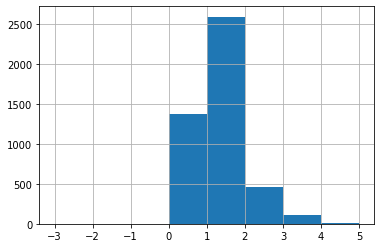

In [255]:
a.hist(bins=8)

In [248]:
# o ile różni się wiek dzieci
a.value_counts()

 1    2589
 0    1378
 2     460
 3     116
 4       7
 5       2
-2       1
-3       1
dtype: int64

## 2. Wstępna analiza

#### histogram wyniku testu

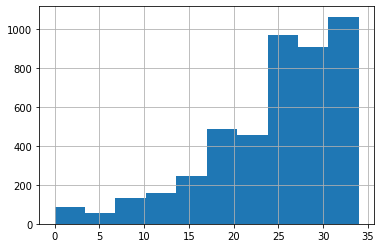

In [114]:
data["PWZ_WYNIK"].hist()

#### histogram wyniku testu w podziale na płeć

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffda4e2e190>,
      dtype=object)

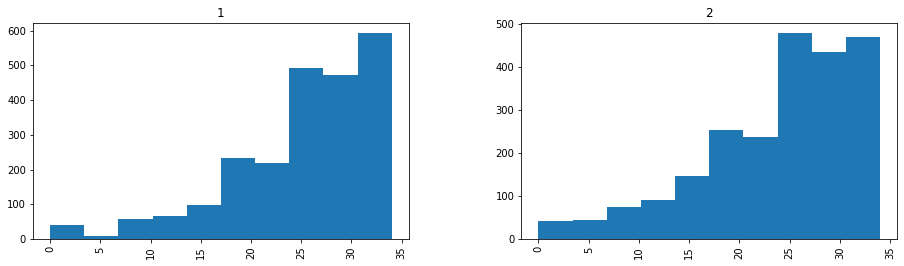

In [152]:
fig = plt.figure(figsize = (15,4))
ax = fig.gca()
data.groupby(["ID_DZIECKA", "PLEC", "PWZ_WYNIK"]).agg({"PWZ_WYNIK":"mean"}).hist(by=("PLEC"), ax=ax)

#### histogram wieku

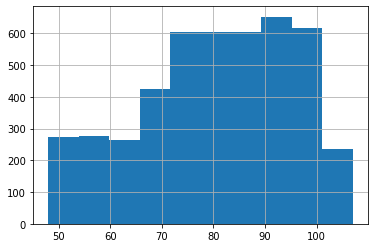

In [115]:
data["WIEK_MIESIACE"].hist()

#### Wiek zaokrąglony do pełnego roku i liczba dzieci w danym przedziale

In [117]:
np.floor(data["WIEK_MIESIACE"]/12).value_counts().sort_index()

4.0     549
5.0     687
6.0    1209
7.0    1255
8.0     854
Name: WIEK_MIESIACE, dtype: int64

#### histogram wyniku testu w poszczególnych grupach wiekowych

In [135]:
data["wiek_rok"] = np.floor(data["WIEK_MIESIACE"]/12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffda5b55990>,
      dtype=object)

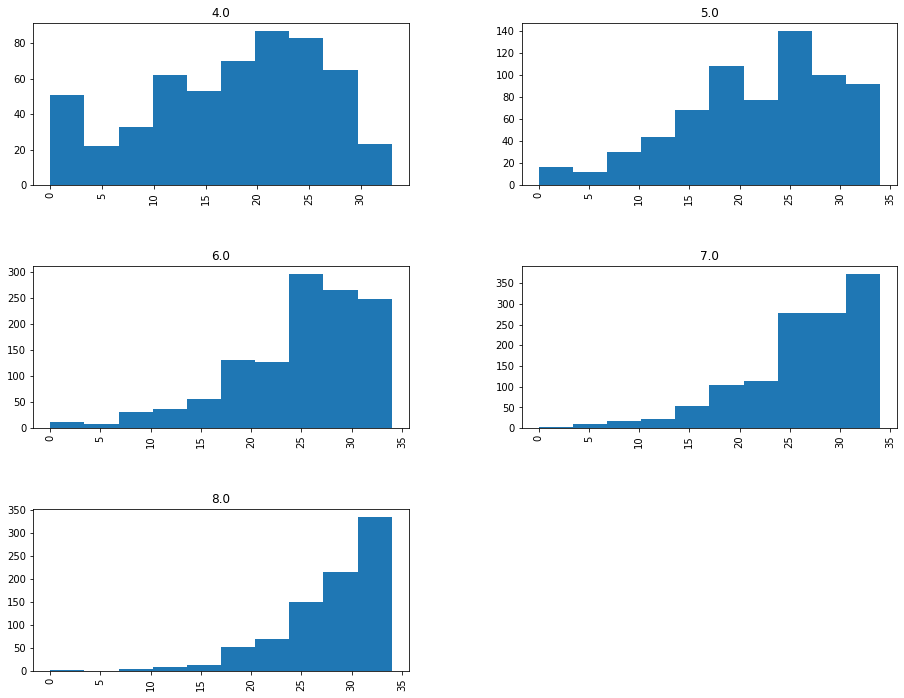

In [156]:
fig = plt.figure(figsize = (15,12))
ax = fig.gca()
data.groupby(["ID_DZIECKA", "wiek_rok", "PWZ_WYNIK"]).agg({"PWZ_WYNIK":"mean"}).hist(by=("wiek_rok"), ax = ax)

### Trudność pytań

In [256]:
data_ref = data.loc[data.WYKLUCZENIE_POWOD_MOWA=="NIE DOTYCZY", :]

##### trudność badana po usunięciu dzieci z powodem wykluczenia innym niż "NIE DOTYCZY"

In [257]:
data_ref.shape, data.shape

((4216, 126), (4554, 126))

#### Uszeregowanie pytań względem malejącej i rosnącej trudności dla wszystkich dzieci i czterolatków
Rankingi są bardzo podobne, choć różni się jak bardzo te pytania są trudne

In [265]:
trudnosc_wszyscy = (data_ref[item_cols].sum()/data_ref.shape[0]).sort_values().rename("trudność wszyscy")
trudnosc_wszyscy

PWZ_34_PKT    0.220351
PWZ_32_PKT    0.227704
PWZ_31_PKT    0.360769
PWZ_33_PKT    0.490750
PWZ_24_PKT    0.512097
PWZ_30_PKT    0.537002
PWZ_27_PKT    0.553605
PWZ_26_PKT    0.554791
PWZ_29_PKT    0.573292
PWZ_23_PKT    0.582306
PWZ_28_PKT    0.627609
PWZ_25_PKT    0.645636
PWZ_18_PKT    0.688805
PWZ_20_PKT    0.716556
PWZ_22_PKT    0.716793
PWZ_21_PKT    0.738615
PWZ_05_PKT    0.770873
PWZ_19_PKT    0.783918
PWZ_12_PKT    0.798387
PWZ_16_PKT    0.827799
PWZ_17_PKT    0.829696
PWZ_11_PKT    0.832306
PWZ_15_PKT    0.856499
PWZ_06_PKT    0.869070
PWZ_07_PKT    0.873577
PWZ_14_PKT    0.904649
PWZ_01_PKT    0.918169
PWZ_08_PKT    0.918880
PWZ_10_PKT    0.924336
PWZ_09_PKT    0.940465
PWZ_03_PKT    0.942600
PWZ_04_PKT    0.943074
PWZ_13_PKT    0.953273
PWZ_02_PKT    0.967268
Name: trudność wszyscy, dtype: float64

In [283]:
small_kids = data_ref.loc[data_ref.wiek_rok<=5, :]
trudnosc_male = (small_kids[item_cols].sum()/small_kids.shape[0]).sort_values().rename("trudność czterolatki")
trudnosc_male
# .sort_index()

PWZ_32_PKT    0.101180
PWZ_34_PKT    0.110455
PWZ_31_PKT    0.184654
PWZ_33_PKT    0.299325
PWZ_30_PKT    0.301855
PWZ_24_PKT    0.314503
PWZ_27_PKT    0.354132
PWZ_29_PKT    0.397133
PWZ_26_PKT    0.405565
PWZ_23_PKT    0.421585
PWZ_28_PKT    0.456998
PWZ_18_PKT    0.505059
PWZ_22_PKT    0.516863
PWZ_20_PKT    0.525295
PWZ_25_PKT    0.544688
PWZ_21_PKT    0.587690
PWZ_05_PKT    0.613828
PWZ_11_PKT    0.645025
PWZ_12_PKT    0.650084
PWZ_19_PKT    0.668634
PWZ_17_PKT    0.670320
PWZ_16_PKT    0.688027
PWZ_15_PKT    0.752951
PWZ_06_PKT    0.768128
PWZ_07_PKT    0.789207
PWZ_14_PKT    0.805228
PWZ_01_PKT    0.827993
PWZ_08_PKT    0.859191
PWZ_04_PKT    0.868465
PWZ_09_PKT    0.870995
PWZ_10_PKT    0.875211
PWZ_03_PKT    0.886172
PWZ_13_PKT    0.909781
PWZ_02_PKT    0.919056
Name: trudność czterolatki, dtype: float64

In [268]:
pd.concat([trudnosc_wszyscy, trudnosc_male], axis = 1)

/Users/sprzygocka/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,trudność wszyscy,trudność czterolatki
PWZ_01_PKT,0.918169,0.766917
PWZ_02_PKT,0.967268,0.868421
PWZ_03_PKT,0.942600,0.840226
PWZ_04_PKT,0.943074,0.810150
PWZ_05_PKT,0.770873,0.539474
PWZ_06_PKT,0.869070,0.716165
PWZ_07_PKT,0.873577,0.723684
PWZ_08_PKT,0.918880,0.825188
PWZ_09_PKT,0.940465,0.819549
PWZ_10_PKT,0.924336,0.836466


In [282]:
small_kids = data_ref.loc[data_ref.WIEK_MIESIACE<=54, :]
trudnosc_male2 = (small_kids[item_cols].sum()/small_kids.shape[0]).sort_values().rename("trudność czterolatki")
trudnosc_male2

PWZ_32_PKT    0.040134
PWZ_34_PKT    0.050167
PWZ_31_PKT    0.110368
PWZ_30_PKT    0.177258
PWZ_33_PKT    0.187291
PWZ_24_PKT    0.207358
PWZ_27_PKT    0.260870
PWZ_29_PKT    0.290970
PWZ_23_PKT    0.317726
PWZ_26_PKT    0.347826
PWZ_28_PKT    0.367893
PWZ_22_PKT    0.377926
PWZ_18_PKT    0.381271
PWZ_20_PKT    0.418060
PWZ_25_PKT    0.451505
PWZ_21_PKT    0.474916
PWZ_05_PKT    0.498328
PWZ_12_PKT    0.515050
PWZ_11_PKT    0.518395
PWZ_17_PKT    0.525084
PWZ_16_PKT    0.545151
PWZ_19_PKT    0.548495
PWZ_15_PKT    0.675585
PWZ_07_PKT    0.682274
PWZ_06_PKT    0.682274
PWZ_14_PKT    0.725753
PWZ_01_PKT    0.725753
PWZ_04_PKT    0.765886
PWZ_09_PKT    0.792642
PWZ_08_PKT    0.802676
PWZ_10_PKT    0.809365
PWZ_03_PKT    0.816054
PWZ_13_PKT    0.839465
PWZ_02_PKT    0.849498
Name: trudność czterolatki, dtype: float64

In [277]:
trudnosc_male = trudnosc_male.reset_index().rename({"index":"zdanie"}, axis = 1)
trudnosc_male["zdanie"] = trudnosc_male.zdanie.str[0:-4]

In [281]:
pd.merge(trudnosc_male, odp_melted, how="left", on=["zdanie"])

,zdanie,trudność czterolatki,odp
0,PWZ_32,0.040134,Piotr pożycza bratu plecakkiedy on go potrzebuje
1,PWZ_34,0.050167,Mama nie zagra z Magdą dopóki ona jej nie przeprosi
2,PWZ_31,0.110368,Natalia mieszka w bloku przy którym jest plac zabaw
3,PWZ_30,0.177258,Obietnica nagrody zachęca nas do pracy
4,PWZ_33,0.187291,Pan do którego dzwonił tata bardzo nam pomógł
5,PWZ_24,0.207358,Sonia prosi tatę żeby jej kupił komputer
6,PWZ_27,0.260870,Marcin był zły na siostrę bo mu złamała kredkę
7,PWZ_29,0.290970,To jest ten pan którego zaprosili rodzice
8,PWZ_23,0.317726,Kuba znalazł czapkę którą zgubiła babcia
9,PWZ_26,0.347826,Zuzia karmi psa którego dostał Mateusz


In [284]:
pd.concat([trudnosc_male.reset_index(), trudnosc_male2.reset_index()], axis =1)

,index,trudność czterolatki,index,trudność czterolatki
0,PWZ_32_PKT,0.101180,PWZ_32_PKT,0.040134
1,PWZ_34_PKT,0.110455,PWZ_34_PKT,0.050167
2,PWZ_31_PKT,0.184654,PWZ_31_PKT,0.110368
3,PWZ_33_PKT,0.299325,PWZ_30_PKT,0.177258
4,PWZ_30_PKT,0.301855,PWZ_33_PKT,0.187291
5,PWZ_24_PKT,0.314503,PWZ_24_PKT,0.207358
6,PWZ_27_PKT,0.354132,PWZ_27_PKT,0.260870
7,PWZ_29_PKT,0.397133,PWZ_29_PKT,0.290970
8,PWZ_26_PKT,0.405565,PWZ_23_PKT,0.317726
9,PWZ_23_PKT,0.421585,PWZ_26_PKT,0.347826


In [301]:
data_ref = data.loc[data.WYKLUCZENIE_POWOD_MOWA=="NIE DOTYCZY", :]

In [302]:
small_kids = data_ref.loc[data_ref.WIEK_MOWA<=4.5, :]

In [303]:
small_kids.shape

(230, 1200)

In [304]:
item_cols=['RKS_01_PKT',
 'RKS_02_PKT',
 'RKS_03_PKT',
 'RKS_04_PKT',
 'RKS_05_PKT',
 'RKS_06_PKT',
 'RKS_07_PKT',
 'RKS_08_PKT',
 'RKS_09_PKT',
 'RKS_10_PKT',
 'RKS_11_PKT',
 'RKS_12_PKT',
 'RKS_13_PKT',
 'RKS_14_PKT',
 'RKS_15_PKT',
 'RKS_16_PKT',
 'RKS_17_PKT',
 'RKS_18_PKT',
 'RKS_19_PKT',
 'RKS_20_PKT',
 'RKS_21_PKT',
 'RKS_22_PKT',
 'RKS_23_PKT',
 'RKS_24_PKT',
 'RKS_25_PKT',
 'RKS_26_PKT',
 'RKS_27_PKT',
 'RKS_28_PKT',
 'RKS_29_PKT',
 'RKS_30_PKT',
 'RKS_31_PKT',
 'RKS_32_PKT']

In [305]:
trudnosc_male = (small_kids[item_cols].sum()/small_kids.shape[0]).sort_values().rename("trudność czterolatki")

In [328]:
trudnosc_male = trudnosc_male.reset_index().rename({"index":"zdanie"}, axis = 1)
trudnosc_male["zdanie"] = trudnosc_male.zdanie.str[0:-4]

In [325]:
odp_cols = [i for i in data.columns.values  if (i[-3:] == 'ODP') & (i[:3] == 'RKS')]
# odp_cols = [i for i in data.columns.values  if (i[:3] == 'RKS')]
odp = data.loc[data.PWZ_WYNIK==34, odp_cols].iloc[[0], :]
odp

,RKS_01_ODP,RKS_02_ODP,RKS_03_ODP,RKS_04_ODP,RKS_05_ODP,RKS_06_ODP,RKS_07_ODP,RKS_08_ODP,RKS_09_ODP,RKS_10_ODP,RKS_11_ODP,RKS_12_ODP,RKS_13_ODP,RKS_14_ODP,RKS_15_ODP,RKS_16_ODP,RKS_17_ODP,RKS_18_ODP,RKS_19_ODP,RKS_20_ODP,RKS_21_ODP,RKS_22_ODP,RKS_23_ODP,RKS_24_ODP,RKS_25_ODP,RKS_26_ODP,RKS_27_ODP,RKS_28_ODP,RKS_29_ODP,RKS_30_ODP,RKS_31_ODP,RKS_32_ODP
392,4,1,2,3,2,4,3,2,3,2,1,4,1,2,4,3,4,2,3,1,4,2,3,4,1,3,2,3,1,4,1,2


In [326]:
odp_melted = odp.melt(value_vars= odp_cols, value_name = "odp", var_name = "zdanie")
odp_melted.zdanie = odp_melted.zdanie.str[0:-4]

In [317]:
odp_cols

['RKS_01_ODP',
 'RKS_02_ODP',
 'RKS_03_ODP',
 'RKS_04_ODP',
 'RKS_05_ODP',
 'RKS_06_ODP',
 'RKS_07_ODP',
 'RKS_08_ODP',
 'RKS_09_ODP',
 'RKS_10_ODP',
 'RKS_11_ODP',
 'RKS_12_ODP',
 'RKS_13_ODP',
 'RKS_14_ODP',
 'RKS_15_ODP',
 'RKS_16_ODP',
 'RKS_17_ODP',
 'RKS_18_ODP',
 'RKS_19_ODP',
 'RKS_20_ODP',
 'RKS_21_ODP',
 'RKS_22_ODP',
 'RKS_23_ODP',
 'RKS_24_ODP',
 'RKS_25_ODP',
 'RKS_26_ODP',
 'RKS_27_ODP',
 'RKS_28_ODP',
 'RKS_29_ODP',
 'RKS_30_ODP',
 'RKS_31_ODP',
 'RKS_32_ODP']

In [324]:
trudnosc_male.sort_values(ascending = False).reset_index()

,index,trudność czterolatki
0,RKS_15_PKT,0.847826
1,RKS_05_PKT,0.773913
2,RKS_06_PKT,0.760870
3,RKS_16_PKT,0.717391
4,RKS_01_PKT,0.713043
5,RKS_26_PKT,0.656522
6,RKS_32_PKT,0.652174
7,RKS_03_PKT,0.639130
8,RKS_23_PKT,0.639130
9,RKS_31_PKT,0.621739


In [332]:
pd.merge(trudnosc_male, odp_melted, how="left", on=["zdanie"]).sort_values("trudność czterolatki", ascending=False)

,zdanie,trudność czterolatki,odp
31,RKS_15,0.847826,4
30,RKS_05,0.773913,2
29,RKS_06,0.760870,4
28,RKS_16,0.717391,3
27,RKS_01,0.713043,4
26,RKS_26,0.656522,3
25,RKS_32,0.652174,2
24,RKS_03,0.639130,2
23,RKS_23,0.639130,3
22,RKS_31,0.621739,1
